In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [2]:
fashion_mnist_df=pd.read_csv('datasets/fashion-mnist_train.csv')

In [3]:
fashion_mnist_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_mnist_df.shape

(60000, 785)

In [5]:
fashion_mnist_df=fashion_mnist_df.sample(frac=0.3).reset_index(drop=True)

fashion_mnist_df.shape

(18000, 785)

In [6]:
fashion_mnist_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,36,36,27,33,27,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,102,129,129,57,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
LOOPUP={0:'T-shirt',
       1:'Trouser',
       2:'Pullover',
       3:'Dress',
       4:'Coat',
       5:'Sandal',
       6:'Shirt',
       7:'Sneaker',
       8:'Bag',
       9:'Ankle boot'}

In [8]:
def display_image(features,actual_label):
    print('Actual label:',LOOPUP[actual_label])
    
    plt.imshow(features.reshape(28,28))

In [9]:
X=fashion_mnist_df[fashion_mnist_df.columns[1:]]
Y=fashion_mnist_df['label']

In [10]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,36,36,27,33,27,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,102,129,129,57,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
Y.head()

0    0
1    7
2    7
3    0
4    5
Name: label, dtype: int64

In [12]:
X.loc[5].values[:100]

array([  0,   0,   0,   0,   0,   0,   0,  11,   5,  54,  92,  15,   0,
        15,  34,  31,   0,  69,  64,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  25,  34,  11,   2, 103,
       129,  80, 154, 255, 149, 108, 129,  17,  14,  25,  14,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  18,  25,  10,  12,
         0,   1,  76,  95,  72,  95,  79,  60,   0,   0,  11,  12,  20,
        14,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,  28,  11,
        14,  11,  17,   1,   0,  24,  41,  24,  15], dtype=int64)

In [13]:
Y.loc[5]

6

Actual label: Shirt


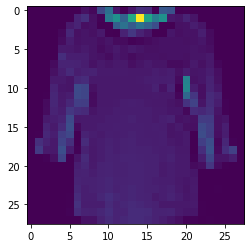

In [14]:
display_image(X.loc[5].values,Y.loc[5])

Actual label: Dress


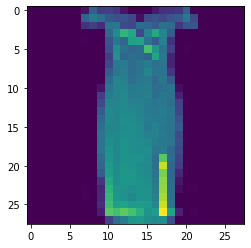

In [15]:
display_image(X.loc[567].values,Y.loc[567])

Actual label: Sandal


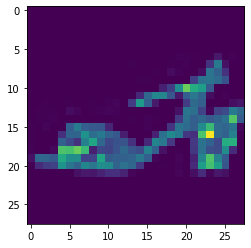

In [16]:
display_image(X.loc[15088].values,Y.loc[15088])

In [17]:
X=X/255.
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.141176,0.141176,0.105882,0.129412,0.105882,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.400000,0.505882,0.505882,0.223529,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [19]:
x_train.shape,y_train.shape

((14400, 784), (14400,))

In [20]:
x_test.shape,y_test.shape

((3600, 784), (3600,))

In [25]:
def summarize_classification(y_test,
                             y_pred,
                             avg_method='weighted'):
    acc=accuracy_score(y_test,y_pred,normalize=True)
    num_acc=accuracy_score(y_test,y_pred,normalize=False)
    
    prec=precision_score(y_test,y_pred,average='weighted')
    recall=recall_score(y_test,y_pred,average='weighted')
    
    print('Test data count:',len(y_test))
    print('accuracy score:',acc)
    print('accuracy count:',num_acc)
    print('precision score:',prec)
    print('recall score:',recall)

In [26]:
logistic_model=LogisticRegression(solver='sag',multi_class='auto',max_iter=10000).fit(x_train,y_train)

In [27]:
y_pred=logistic_model.predict(x_test)

y_pred

array([8, 3, 2, ..., 2, 4, 1], dtype=int64)

In [28]:
summarize_classification(y_test,y_pred)

Test data count: 3600
accuracy score: 0.8286111111111111
accuracy count: 2983
precision score: 0.8304044358595427
recall score: 0.8286111111111111
